In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
from sklearn import cluster, datasets, mixture
from sklearn.preprocessing import minmax_scale

In [27]:
np.random.seed(0)

https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html

In [28]:
n_samples = 300

noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)

dbs = [
    noisy_circles,
    noisy_moons,
    blobs
]

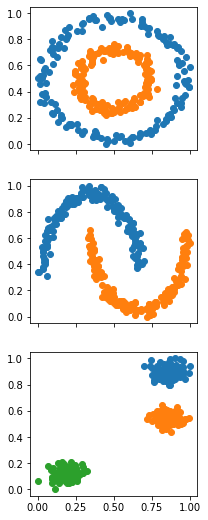

In [30]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(3, 9), sharex=True, sharey=True)

for db, ax in zip (dbs, axs):
    points, labels = minmax_scale(db[0]), db[1]
    possible_labels = set(labels)
    for y in possible_labels:
        ax.scatter(points[labels == y][:, 0], points[labels == y][:, 1])
    
plt.show()

In [35]:
X = np.array([
    [1, 0],
    [0, 1]
])
a = X[0]
b = X[1]

In [159]:
def eucl_dist(a, b):
    return np.linalg.norm(a - b)

def get_adj_matrix(X, k):
    A = np.eye(X.shape[0])
    for i, x in enumerate(X):
        distances = np.linalg.norm(X - x, axis=1)
        distances[i] = max(distances)
        k_closest_ind = distances.argsort()[:k]
        A[i][k_closest_ind] = 1
    return A / (k + 1)

def make_iteration(X, A):
    return A.dot(X)

def knn_sync(X, k, eps=1e-5):
    Xs = []
    As = []
    X_old = X
    while True:

        A = get_adj_matrix(X_old, k)
        X_new = make_iteration(X_old, A)
        
        Xs.append(X_old)
        As.append(A)

        if np.linalg.norm(X_old - X_new) < eps: # or (len(As) > 2 and (A[-1].nonzero() == A[-2].nonzero()).all()) :
            return Xs, As
        X_old = X_new

In [136]:
db = noisy_moons

points = minmax_scale(db[0])
labels = db[1]
possible_labels = set(labels)

In [137]:
Xs, As = knn_sync(points, 50)
print(len(Xs))

133


In [140]:
N = len(Xs)
iterations_subsample = Xs[::5] + [Xs[-1]]
sub_N = len(iterations_subsample)

ncols = 3
nrows = int(np.ceil(sub_N / ncols))

In [151]:
# fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(9, 24), sharex=True, sharey=True)


# for i, X_i in enumerate(iterations_subsample):
#     ax = axs.reshape(-1)[i]
#     for y in possible_labels:
#         ax.scatter(X_i[labels == y][:, 0], X_i[labels == y][:, 1])
    
# plt.show()

In [144]:
db = np.random.rand(n_samples, 2), np.zeros(n_samples)

points = minmax_scale(db[0])
labels = db[1]
possible_labels = set(labels)

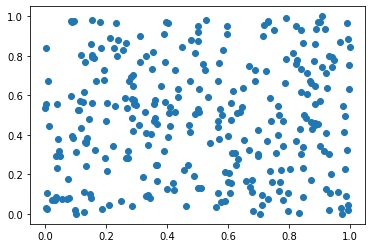

In [146]:
plt.scatter(points[:, 0], points[:, 1])
plt.show()

N Neighbors: 3
Iterations:  66
N clusters:  57


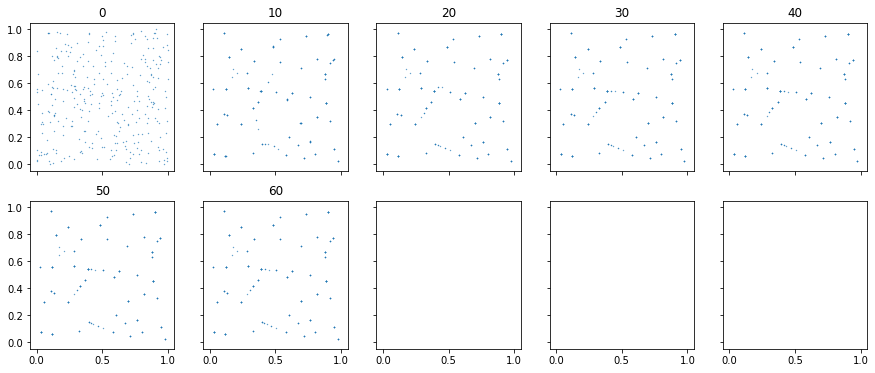

In [206]:
K = 3

Xs, As = knn_sync(points, K)
print("N Neighbors:", K)
print("Iterations: ", len(Xs))
print("N clusters: ", np.unique(np.around(Xs[-1], decimals=5), axis=0).shape[0])

N = len(Xs)
freq = 10
indexes_subsample = np.arange(0, N, freq, dtype=int)
iterations_subsample = Xs[::freq]
sub_N = len(iterations_subsample)

ncols = 5
nrows = int(np.ceil(sub_N / ncols))

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 3, nrows * 3), sharex=True, sharey=True)

for i, X_i in enumerate(iterations_subsample):
    ax = axs.reshape(-1)[i]
    for y in possible_labels:
        ax.set_title(str(indexes_subsample[i]))
        ax.scatter(X_i[labels == y][:, 0], X_i[labels == y][:, 1], s=1e-1)
    
plt.show()

N Neighbors: 5
Iterations:  55
N clusters:  36


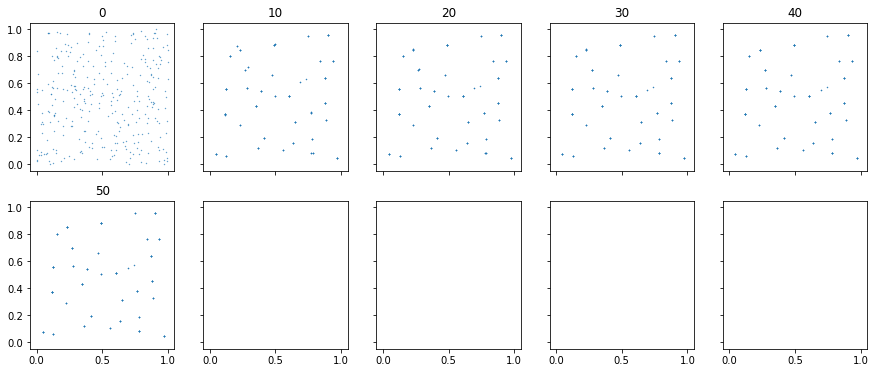

In [207]:
K = 5

Xs, As = knn_sync(points, K)
print("N Neighbors:", K)
print("Iterations: ", len(Xs))
print("N clusters: ", np.unique(np.around(Xs[-1], decimals=5), axis=0).shape[0])

N = len(Xs)
freq = 10
indexes_subsample = np.arange(0, N, freq, dtype=int)
iterations_subsample = Xs[::freq]
sub_N = len(iterations_subsample)

ncols = 5
nrows = int(np.ceil(sub_N / ncols))

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 3, nrows * 3), sharex=True, sharey=True)

for i, X_i in enumerate(iterations_subsample):
    ax = axs.reshape(-1)[i]
    for y in possible_labels:
        ax.set_title(str(indexes_subsample[i]))
        ax.scatter(X_i[labels == y][:, 0], X_i[labels == y][:, 1], s=1e-1)
    
plt.show()

N Neighbors: 10
Iterations:  90
N clusters:  18


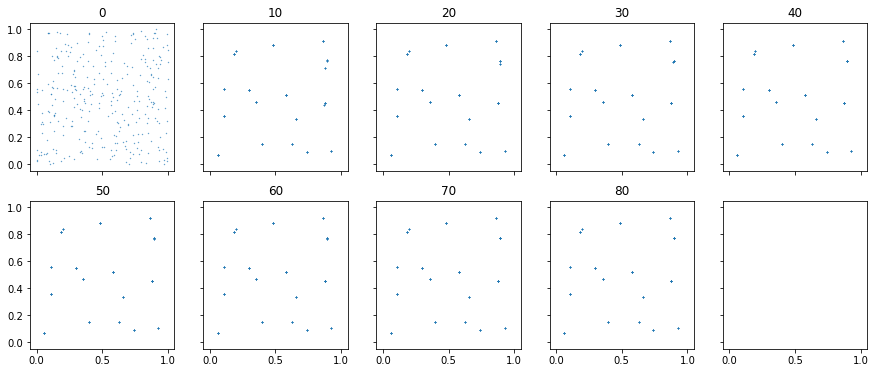

In [208]:
K = 10

Xs, As = knn_sync(points, K)
print("N Neighbors:", K)
print("Iterations: ", len(Xs))
print("N clusters: ", np.unique(np.around(Xs[-1], decimals=5), axis=0).shape[0])

N = len(Xs)
freq = 10
indexes_subsample = np.arange(0, N, freq, dtype=int)
iterations_subsample = Xs[::freq]
sub_N = len(iterations_subsample)

ncols = 5
nrows = int(np.ceil(sub_N / ncols))

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 3, nrows * 3), sharex=True, sharey=True)

for i, X_i in enumerate(iterations_subsample):
    ax = axs.reshape(-1)[i]
    for y in possible_labels:
        ax.set_title(str(indexes_subsample[i]))
        ax.scatter(X_i[labels == y][:, 0], X_i[labels == y][:, 1], s=1e-1)
    
plt.show()

N Neighbors: 20
Iterations:  99
N clusters:  12


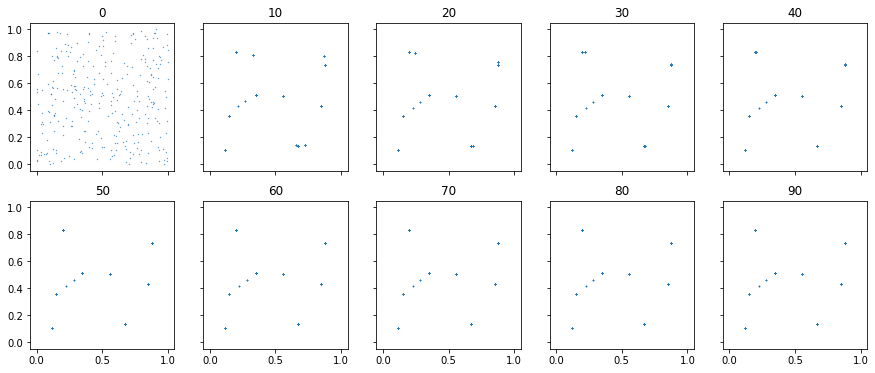

In [209]:
K = 20

Xs, As = knn_sync(points, K)
print("N Neighbors:", K)
print("Iterations: ", len(Xs))
print("N clusters: ", np.unique(np.around(Xs[-1], decimals=5), axis=0).shape[0])

N = len(Xs)
freq = 10
indexes_subsample = np.arange(0, N, freq, dtype=int)
iterations_subsample = Xs[::freq]
sub_N = len(iterations_subsample)

ncols = 5
nrows = int(np.ceil(sub_N / ncols))

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 3, nrows * 3), sharex=True, sharey=True)

for i, X_i in enumerate(iterations_subsample):
    ax = axs.reshape(-1)[i]
    for y in possible_labels:
        ax.set_title(str(indexes_subsample[i]))
        ax.scatter(X_i[labels == y][:, 0], X_i[labels == y][:, 1], s=1e-1)
    
plt.show()

N Neighbors: 30
Iterations:  45
N clusters:  7


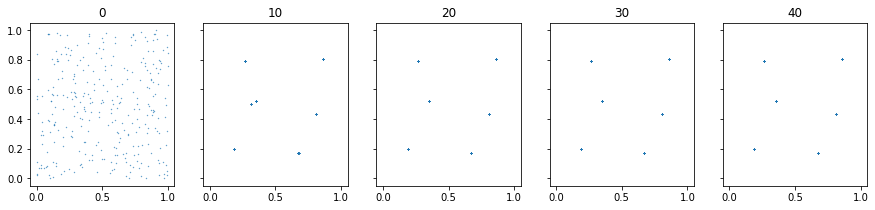

In [211]:
K = 30

Xs, As = knn_sync(points, K)
print("N Neighbors:", K)
print("Iterations: ", len(Xs))
print("N clusters: ", np.unique(np.around(Xs[-1], decimals=5), axis=0).shape[0])

N = len(Xs)
freq = 10
indexes_subsample = np.arange(0, N, freq, dtype=int)
iterations_subsample = Xs[::freq]
sub_N = len(iterations_subsample)

ncols = 5
nrows = int(np.ceil(sub_N / ncols))

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 3, nrows * 3), sharex=True, sharey=True)

for i, X_i in enumerate(iterations_subsample):
    ax = axs.reshape(-1)[i]
    for y in possible_labels:
        ax.set_title(str(indexes_subsample[i]))
        ax.scatter(X_i[labels == y][:, 0], X_i[labels == y][:, 1], s=1e-1)
    
plt.show()

N Neighbors: 50
Iterations:  218
N clusters:  4


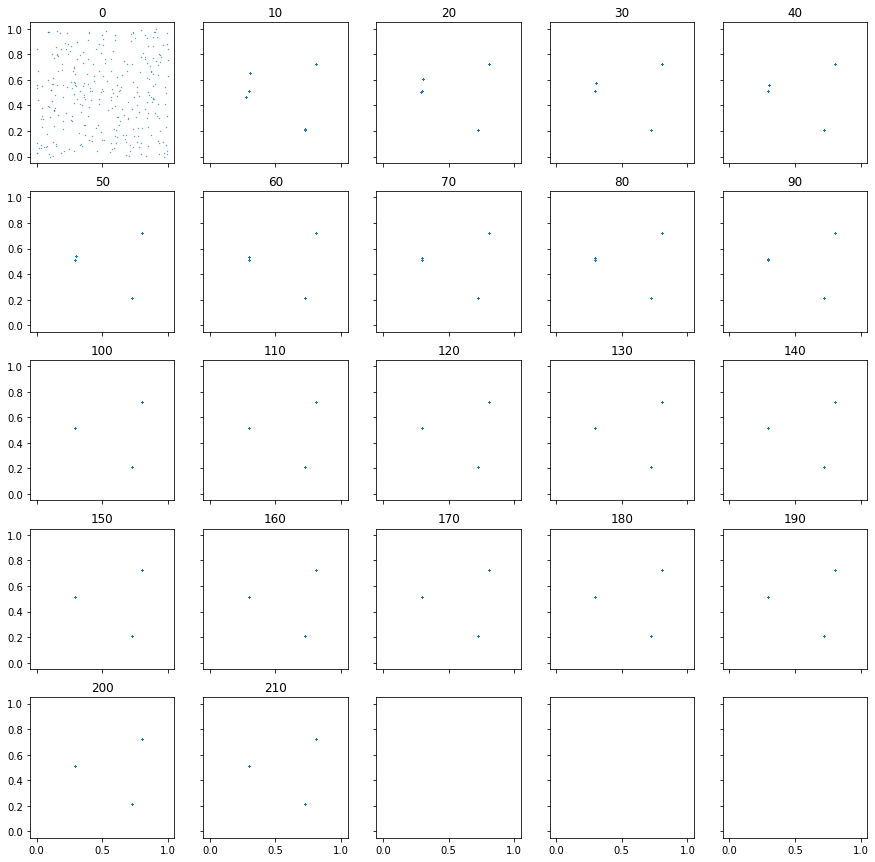

In [212]:
K = 50

Xs, As = knn_sync(points, K)
print("N Neighbors:", K)
print("Iterations: ", len(Xs))
print("N clusters: ", np.unique(np.around(Xs[-1], decimals=5), axis=0).shape[0])

N = len(Xs)
freq = 10
indexes_subsample = np.arange(0, N, freq, dtype=int)
iterations_subsample = Xs[::freq]
sub_N = len(iterations_subsample)

ncols = 5
nrows = int(np.ceil(sub_N / ncols))

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 3, nrows * 3), sharex=True, sharey=True)

for i, X_i in enumerate(iterations_subsample):
    ax = axs.reshape(-1)[i]
    for y in possible_labels:
        ax.set_title(str(indexes_subsample[i]))
        ax.scatter(X_i[labels == y][:, 0], X_i[labels == y][:, 1], s=1e-1)
    
plt.show()

N Neighbors: 100
Iterations:  20
N clusters:  2


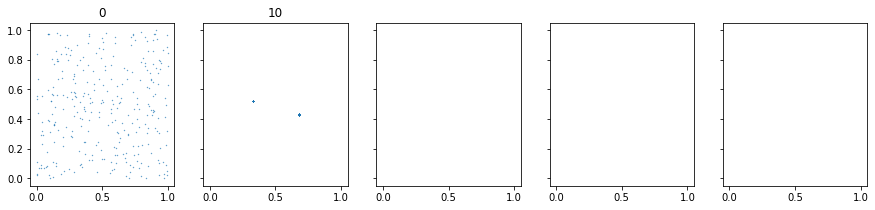

In [213]:
K = 100

Xs, As = knn_sync(points, K)
print("N Neighbors:", K)
print("Iterations: ", len(Xs))
print("N clusters: ", np.unique(np.around(Xs[-1], decimals=5), axis=0).shape[0])

N = len(Xs)
freq = 10
indexes_subsample = np.arange(0, N, freq, dtype=int)
iterations_subsample = Xs[::freq]
sub_N = len(iterations_subsample)

ncols = 5
nrows = int(np.ceil(sub_N / ncols))

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 3, nrows * 3), sharex=True, sharey=True)

for i, X_i in enumerate(iterations_subsample):
    ax = axs.reshape(-1)[i]
    for y in possible_labels:
        ax.set_title(str(indexes_subsample[i]))
        ax.scatter(X_i[labels == y][:, 0], X_i[labels == y][:, 1], s=1e-1)
    
plt.show()

N Neighbors: 150
Iterations:  347
N clusters:  2


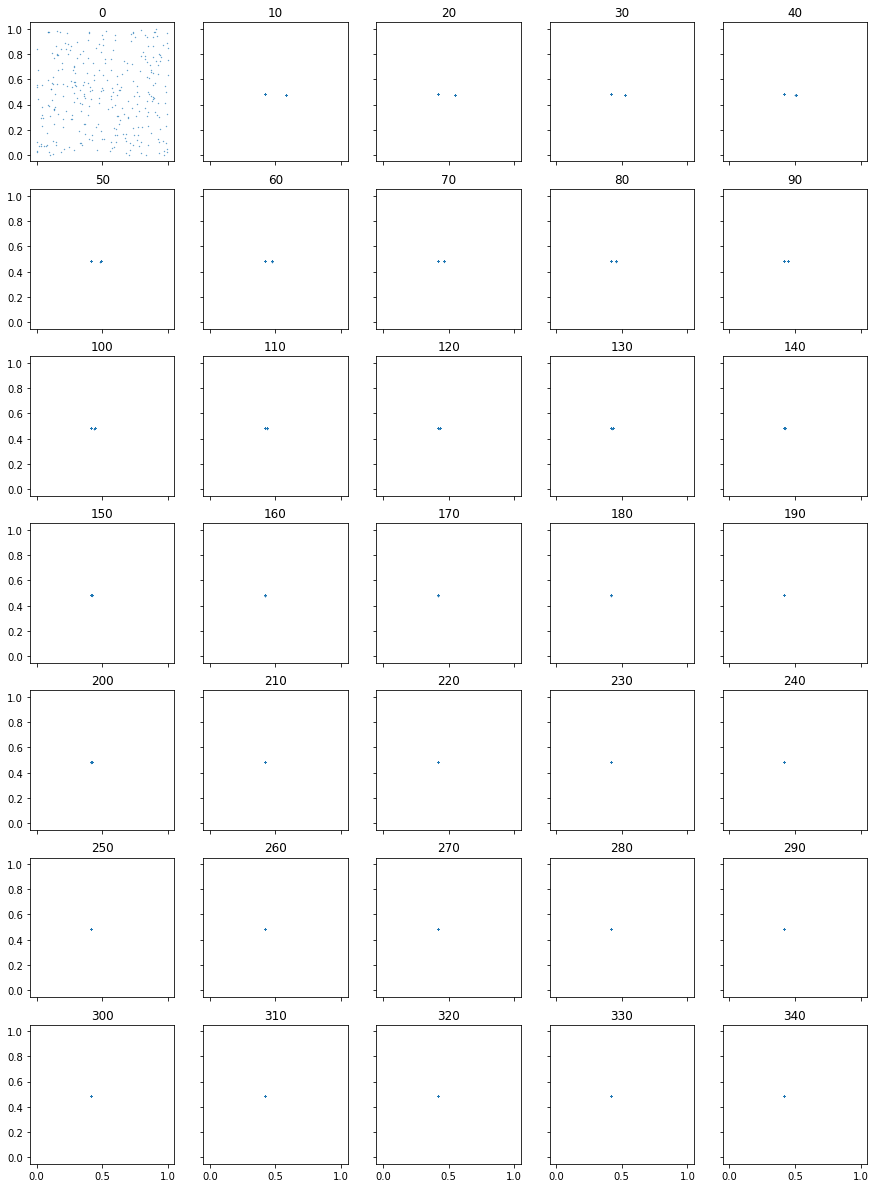

In [214]:
K = 150

Xs, As = knn_sync(points, K)
print("N Neighbors:", K)
print("Iterations: ", len(Xs))
print("N clusters: ", np.unique(np.around(Xs[-1], decimals=5), axis=0).shape[0])

N = len(Xs)
freq = 10
indexes_subsample = np.arange(0, N, freq, dtype=int)
iterations_subsample = Xs[::freq]
sub_N = len(iterations_subsample)

ncols = 5
nrows = int(np.ceil(sub_N / ncols))

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 3, nrows * 3), sharex=True, sharey=True)

for i, X_i in enumerate(iterations_subsample):
    ax = axs.reshape(-1)[i]
    for y in possible_labels:
        ax.set_title(str(indexes_subsample[i]))
        ax.scatter(X_i[labels == y][:, 0], X_i[labels == y][:, 1], s=1e-1)
    
plt.show()

## Go for ergodicity coef

In [291]:
def ortogonalize(x, v):
    return x - v * x.dot(v)

def ergod_coef_estimate(A, n_iter=1e3):
    n = A.shape[0]
    v = np.sum(A > 0, axis=1)
    res = 0
    for _ in range(int(n_iter)):
        x = np.random.rand(n)
        x = x - v * x.dot(v)
        x = x / np.linalg.norm(x)
        res = max(np.linalg.norm(A.dot(x)), res)
    return res    

In [290]:
K = 150

Xs, As = knn_sync(points, K, eps=1e-10)

print("N Neighbors:", K)
print("Iterations: ", len(Xs))
print("N clusters: ", np.unique(np.around(Xs[-1], decimals=5), axis=0).shape[0])

N Neighbors: 150
Iterations:  754
N clusters:  1


In [292]:
ergs = [ergod_coef_estimate(A) for A in As]

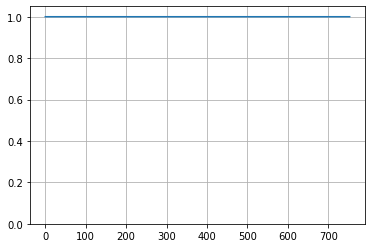

In [293]:
plt.plot(np.arange(len(As)), ergs)
plt.ylim(0.0, 1.05)
plt.grid()
plt.show()

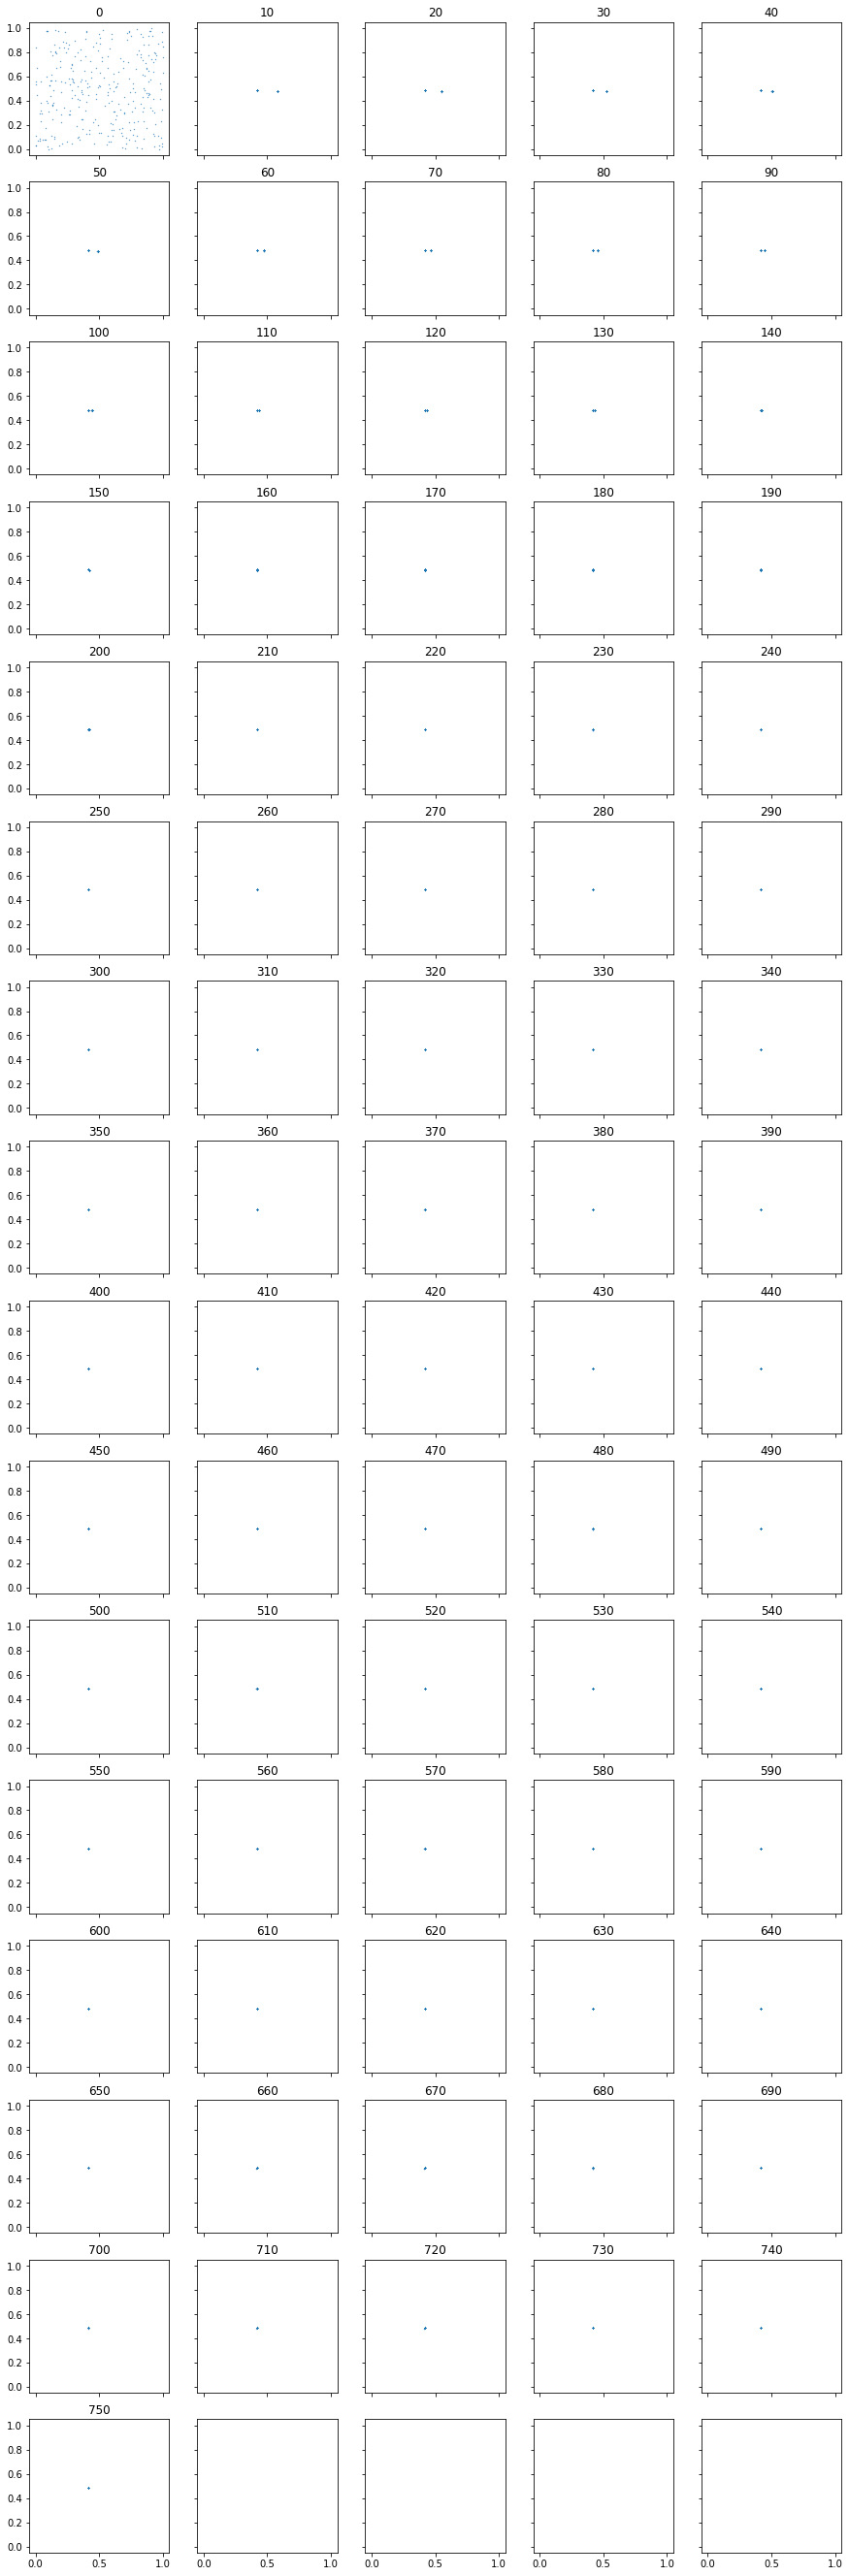

In [294]:
N = len(Xs)
freq = 10
indexes_subsample = np.arange(0, N, freq, dtype=int)
iterations_subsample = Xs[::freq]
sub_N = len(iterations_subsample)

ncols = 5
nrows = int(np.ceil(sub_N / ncols))

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 3, nrows * 3), sharex=True, sharey=True)

for i, X_i in enumerate(iterations_subsample):
    ax = axs.reshape(-1)[i]
    for y in possible_labels:
        ax.set_title(str(indexes_subsample[i]))
        ax.scatter(X_i[labels == y][:, 0], X_i[labels == y][:, 1], s=1e-1)
    
plt.show()

## Small graphs

In [252]:
import networkx as nx
import itertools
import copy

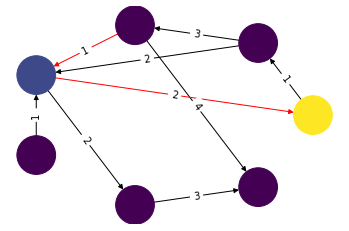

In [298]:
import pylab

G = nx.DiGraph()

G.add_edges_from([('A', 'B'),('C','D'),('G','D')], weight=1)
G.add_edges_from([('D','A'),('D','E'),('B','D'),('D','E')], weight=2)
G.add_edges_from([('B','C'),('E','F')], weight=3)
G.add_edges_from([('C','F')], weight=4)


val_map = {'A': 1.0,
                   'D': 0.5714285714285714,
                              'H': 0.0}

values = [val_map.get(node, 0.45) for node in G.nodes()]
edge_labels=dict([((u,v,),d['weight'])
                 for u,v,d in G.edges(data=True)])
red_edges = [('C','D'),('D','A')]
edge_colors = ['black' if not edge in red_edges else 'red' for edge in G.edges()]

pos=nx.spring_layout(G, pos=nx.circular_layout(G))
nx.draw_networkx_edge_labels(G,pos=nx.circular_layout(G),edge_labels=edge_labels)
nx.draw(G,pos=nx.circular_layout(G), node_color = values, node_size=1500,edge_color=edge_colors,edge_cmap=plt.cm.Reds)
pylab.show()